## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

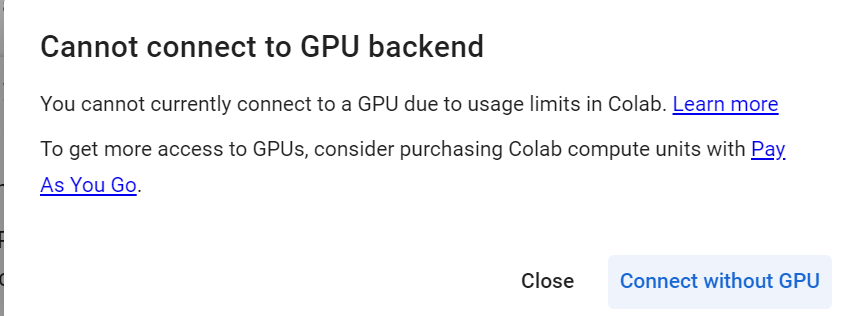

## **Installing and Importing Necessary Libraries**

In [4]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 844.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.7 MB/s eta 0:00:00


In [5]:
%pip install scikit-learn sklearn-pandas
# matplotlib seaborn scikit-learn sklearn-pandas -q --user

In [103]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML models from sklean
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# Word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [7]:
stock_data = pd.read_csv("stock_news.csv")

In [8]:
# Create a copy of the data
stock_data_copy = stock_data.copy()

## **Data Overview**

In [9]:
# Check the data types
stock_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


In [10]:
# Number of rows and columns
stock_data_copy.shape

(349, 8)

In [11]:
# Check first few records
stock_data_copy.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


In [12]:
# Check statistical summary
stock_data_copy.describe()

,Open,High,Low,Close,Volume,Label
count,349.000000,349.000000,349.000000,349.000000,3.490000e+02,349.000000
mean,46.229233,46.700458,45.745394,44.926317,1.289482e+08,-0.054441
std,6.442817,6.507321,6.391976,6.398338,4.317031e+07,0.715119
min,37.567501,37.817501,37.305000,36.254131,4.544800e+07,-1.000000
25%,41.740002,42.244999,41.482498,40.246914,1.032720e+08,-1.000000
50%,45.974998,46.025002,45.639999,44.596924,1.156272e+08,0.000000
75%,50.707500,50.849998,49.777500,49.110790,1.511252e+08,0.000000
max,66.817497,67.062500,65.862503,64.805229,2.444392e+08,1.000000


In [13]:
# check for missing and duplicate values
print(f"Number of missing rows: {stock_data_copy.isnull().sum()}")
duplicated_rows = stock_data_copy[stock_data_copy.duplicated()]
print(f"Number of duplicated rows: {duplicated_rows.shape[0]}")

Number of missing rows: Date      0
News      0
Open      0
High      0
Low       0
Close     0
Volume    0
Label     0
dtype: int64
Number of duplicated rows: 0


In [14]:
# Change the data type of the date field from Object to datetime
stock_data_copy['Date'] = pd.to_datetime(stock_data_copy['Date'])
stock_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    349 non-null    datetime64[ns]
 1   News    349 non-null    object        
 2   Open    349 non-null    float64       
 3   High    349 non-null    float64       
 4   Low     349 non-null    float64       
 5   Close   349 non-null    float64       
 6   Volume  349 non-null    int64         
 7   Label   349 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 21.9+ KB


## **Exploratory Data Analysis**

### Univariate Analysis

* Distribution of individual variables
* Compute and check the distribution of the length of news content

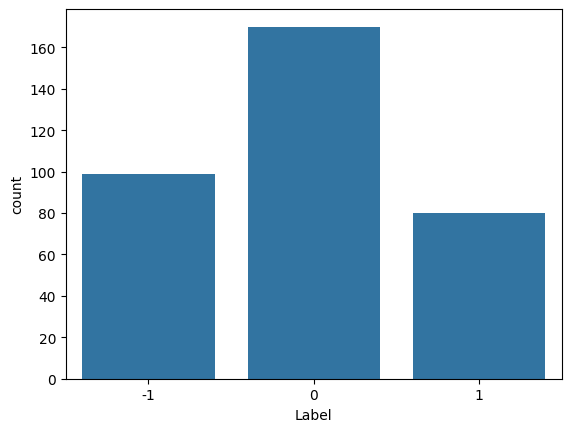

In [15]:
sns.countplot(data=stock_data_copy, x="Label");

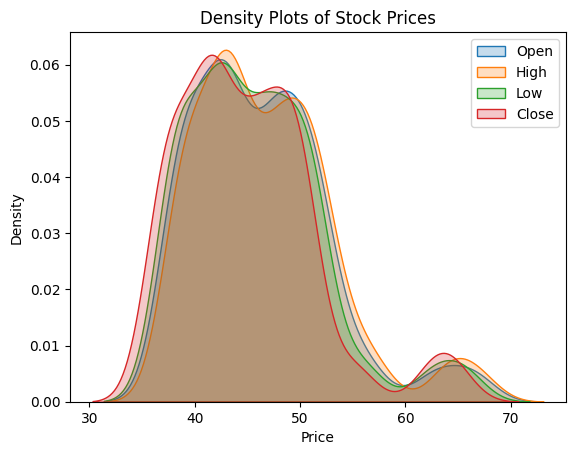

In [16]:
# Plot density plots for 'Open', 'High', 'Low', and 'Close' columns
for col in ['Open', 'High', 'Low', 'Close']:
  sns.kdeplot(stock_data_copy[col], label=col, shade=True)
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Density Plots of Stock Prices")
plt.legend()
plt.show()

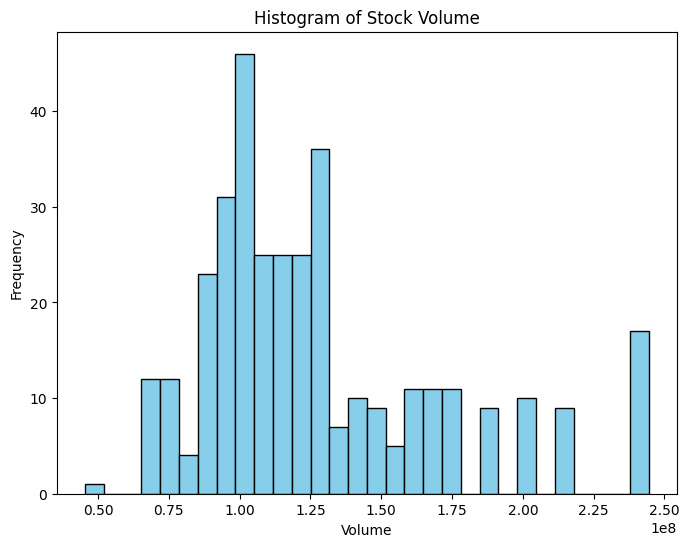

In [17]:
# Plot a histogram of 'Volume'
plt.figure(figsize=(8, 6))
plt.hist(stock_data_copy['Volume'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Histogram of Stock Volume')
plt.show()

In [18]:
# Calculate the total number of words in the 'News' column
stock_data_copy['news_word_length'] = stock_data_copy['News'].apply(lambda x: len(str(x).split()))
stock_data_copy.head()



,Date,News,Open,High,Low,Close,Volume,Label,news_word_length
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1,45
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1,50
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1,48
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1,50
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1,49


In [19]:
# Calculate the length of each news content
stock_data_copy['News_length'] = stock_data_copy['News'].astype(str).apply(len)

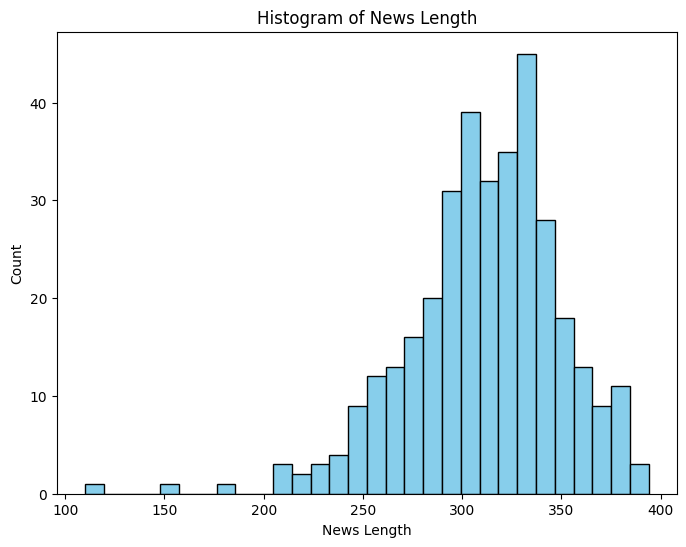

In [20]:
# Plot a histogram of news_length column

plt.figure(figsize=(8, 6))
plt.hist(stock_data_copy['News_length'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('News Length')
plt.ylabel('Count')
plt.title('Histogram of News Length')
plt.show()

### Bivariate Analysis

* Correlation
* Sentiment Polarity vs Price
* Date vs Price

**Note**: The above points are listed to provide guidance on how to approach bivariate analysis. Analysis has to be done beyond the above listed points to get maximum scores.

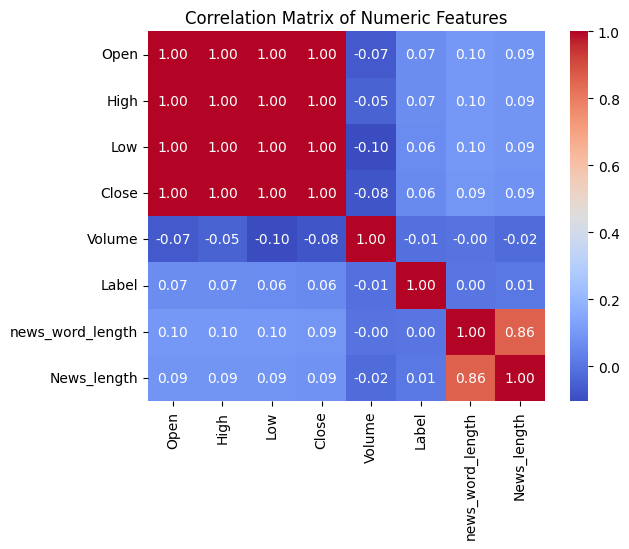

In [21]:
# Calculate the correlation matrix for numeric columns
numeric_cols = stock_data_copy.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


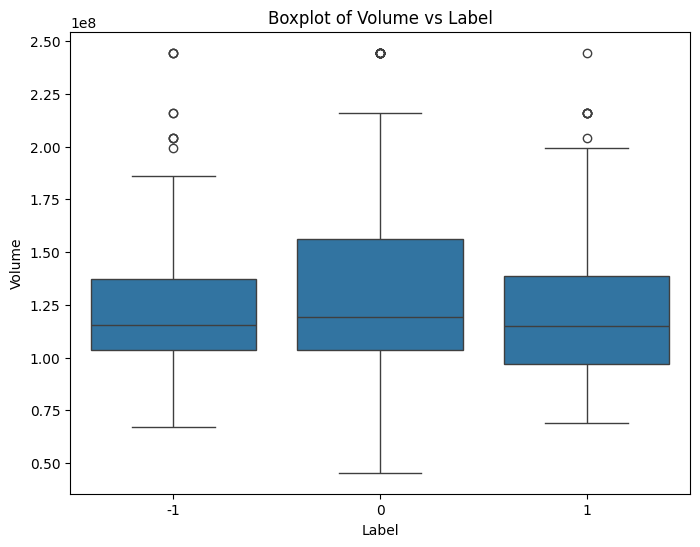

In [22]:
# Plot a boxplot of Label vs Volume

plt.figure(figsize=(8, 6))
sns.boxplot(x='Label', y='Volume', data=stock_data_copy)
plt.title('Boxplot of Volume vs Label')
plt.xlabel('Label')
plt.ylabel('Volume')
plt.show()


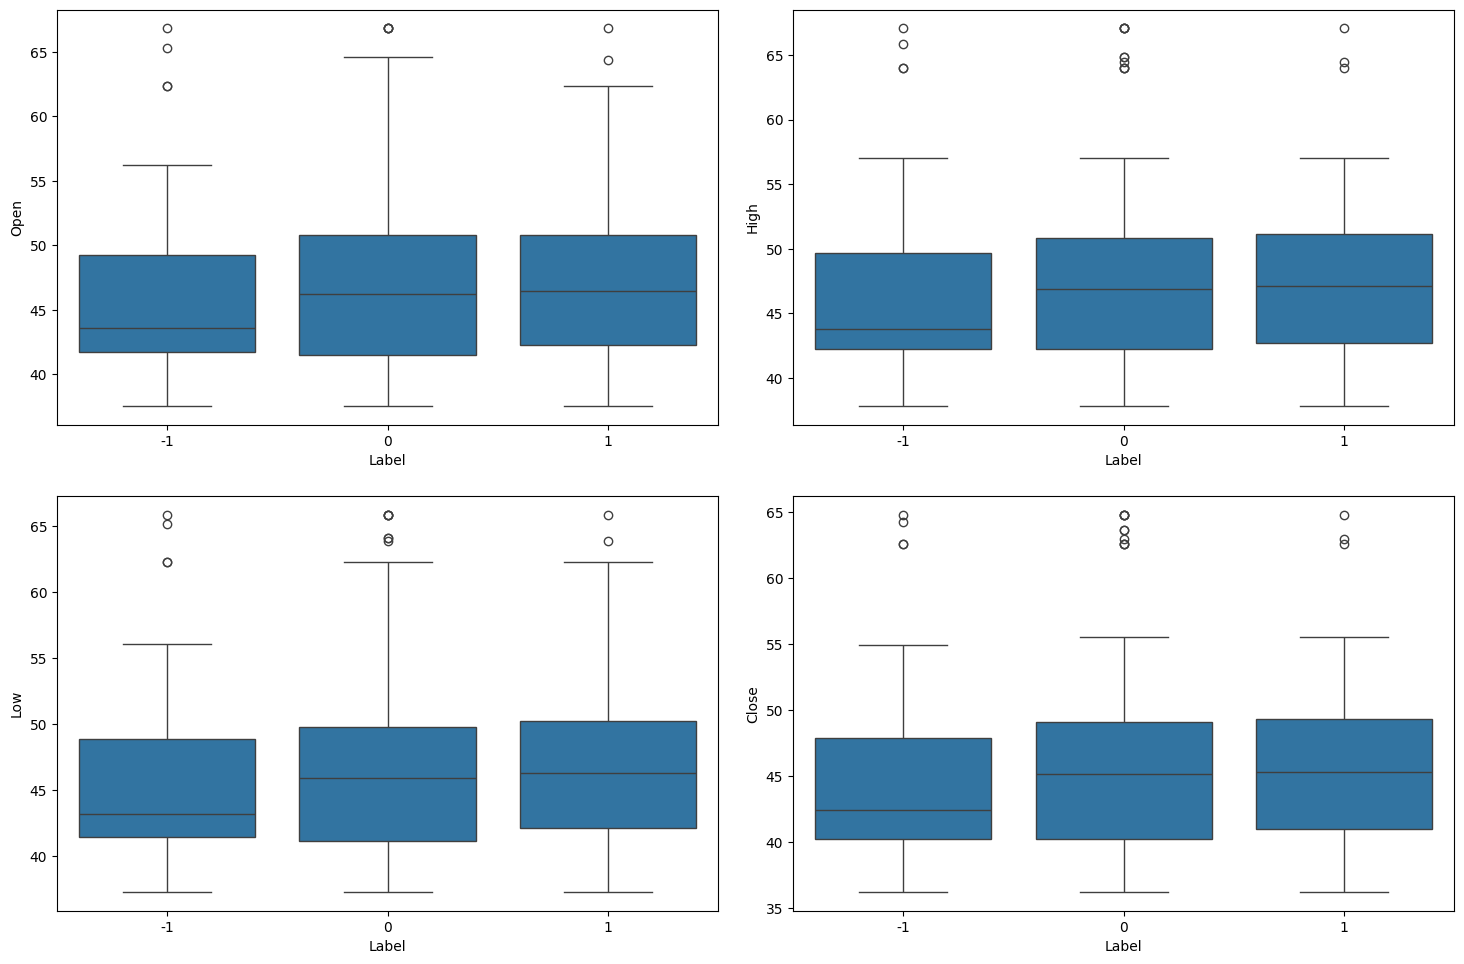

In [23]:
# Plot the columns ['Open', 'High', 'Low', 'Close'] Vs label
plt.figure(figsize=(15, 10))

for i, column in enumerate(['Open', 'High', 'Low', 'Close'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=stock_data_copy, x="Label", y=column)
    plt.tight_layout(pad=2)

plt.show()

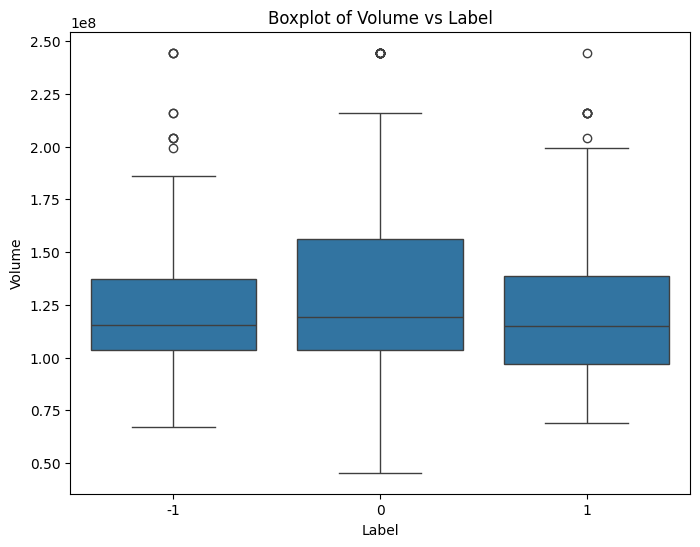

In [24]:
# Plot a boxplot of Label vs Volume
plt.figure(figsize=(8, 6))
sns.boxplot(x='Label', y='Volume', data=stock_data_copy)
plt.title('Boxplot of Volume vs Label')
plt.xlabel('Label')
plt.ylabel('Volume')
plt.show()


In [25]:
# Aggregate the price by day
day_stock = stock_data_copy.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()

day_stock.set_index('Date', inplace=True)
day_stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,41.740002,42.244999,41.482498,40.246914,130672400.0
2019-01-03,43.570000,43.787498,43.222500,42.470604,103544800.0
2019-01-04,47.910000,47.919998,47.095001,46.419842,111448000.0
2019-01-07,50.792500,51.122501,50.162498,49.110790,109012000.0
2019-01-08,53.474998,54.507500,51.685001,50.787209,216071600.0


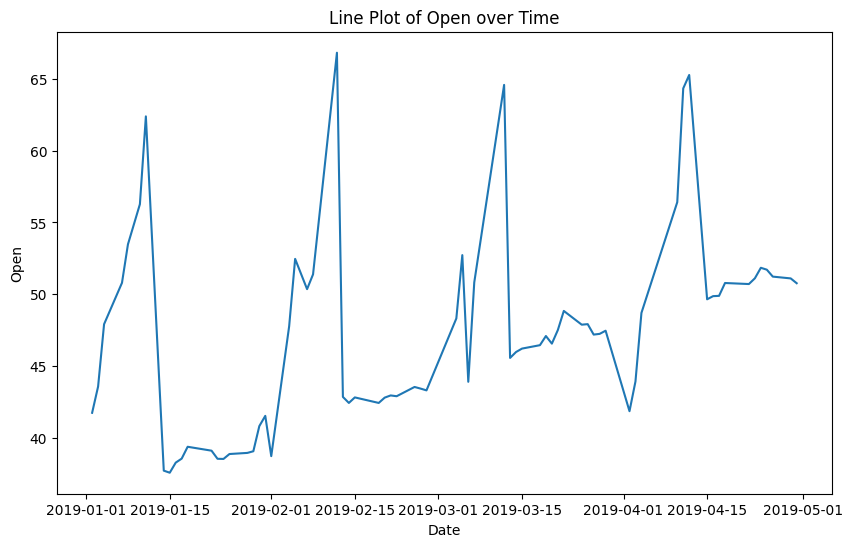

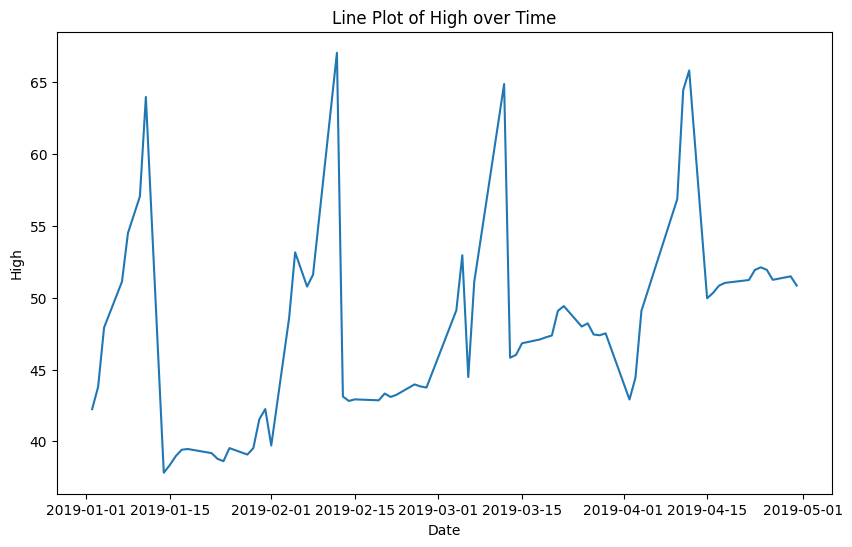

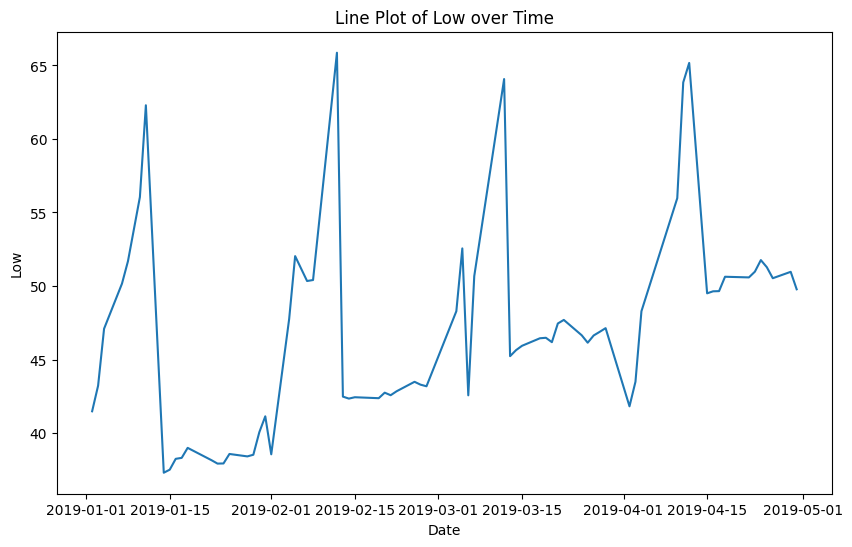

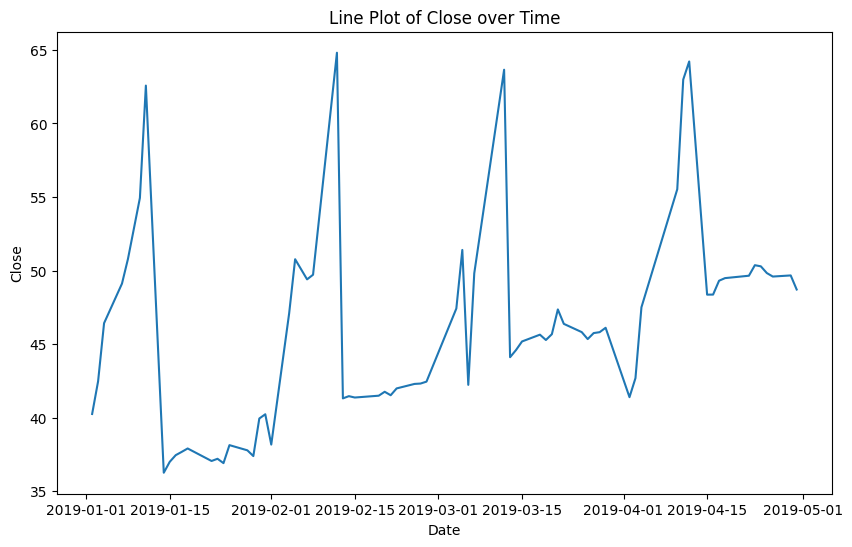

In [26]:
# Plot a lineplot of all the variables except Volume

# Plot lineplots for 'Open', 'High', 'Low', and 'Close' columns
for col in ['Open', 'High', 'Low', 'Close']:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=day_stock.index, y=day_stock[col])
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.title(f"Line Plot of {col} over Time")
    plt.show()


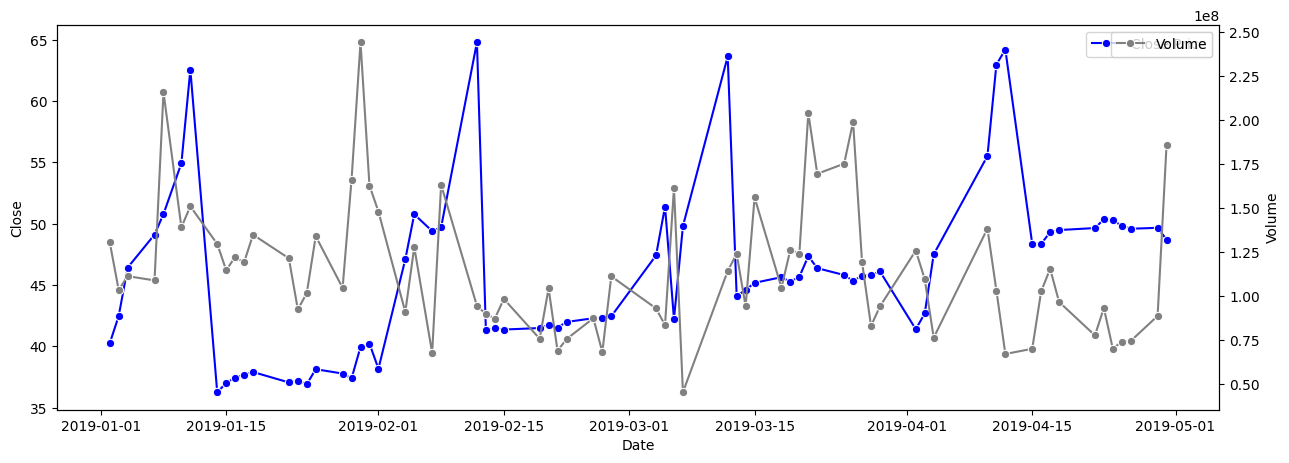

In [27]:
# Plot 'Volume' vs 'Close' price
#Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15,5))

# Lineplot on primary y-axis
sns.lineplot(data=day_stock.reset_index(), x='Date', y='Close', ax=ax1, color='blue', marker='o', label='Close Price')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Lineplot on secondary y-axis
sns.lineplot(data=day_stock.reset_index(), x='Date', y='Volume', ax=ax2, color='gray', marker='o', label='Volume')

ax1.legend(bbox_to_anchor=(1,1));

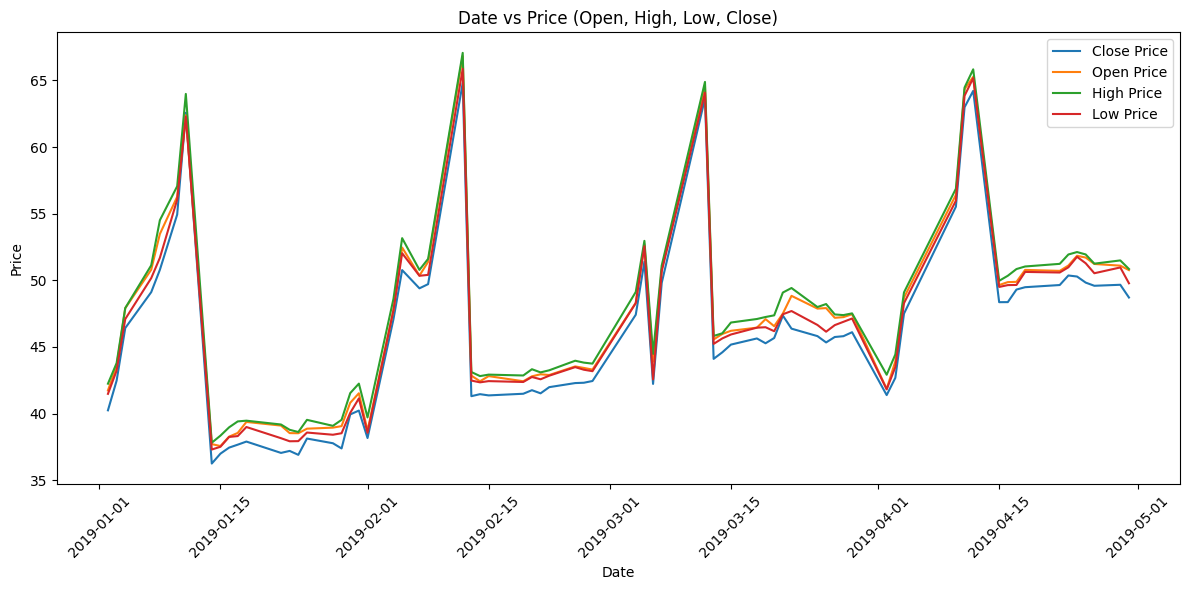

In [28]:
# prompt: Date vs Price (Open, High, Low, Close)

import matplotlib.pyplot as plt

# Assuming 'stock_data_copy' DataFrame is already loaded and processed as in the provided code.

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(stock_data_copy['Date'], stock_data_copy['Close'], label='Close Price')
plt.plot(stock_data_copy['Date'], stock_data_copy['Open'], label='Open Price')
plt.plot(stock_data_copy['Date'], stock_data_copy['High'], label='High Price')
plt.plot(stock_data_copy['Date'], stock_data_copy['Low'], label='Low Price')


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Date vs Price (Open, High, Low, Close)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


## **Data Preprocessing**

In [29]:
# Print the statistical summary of the 'Date' column

stock_data_copy['Date'].describe()


,Date
count,349
mean,2019-02-16 16:05:30.085959936
min,2019-01-02 00:00:00
25%,2019-01-14 00:00:00
50%,2019-02-05 00:00:00
75%,2019-03-22 00:00:00
max,2019-04-30 00:00:00


## **Word Embeddings - Word2vec**

In [30]:
# prompt: # Split the data set into train and test and validation data

from sklearn.model_selection import train_test_split

# Assuming 'stock_data_copy' is your DataFrame and 'Label' is your target variable
X = stock_data_copy.drop('Label', axis=1)  # Features
y = stock_data_copy['Label']  # Target

# Split data into training and temporary sets (test + validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42) # 60% train and 40% temp

# Split the temporary set into test and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # 50% test and 50% validation

# Now you have:
# X_train, y_train: Training data
# X_val, y_val: Validation data
# X_test, y_test: Test data

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Testing data shape:", X_test.shape)



Training data shape: (209, 9)
Validation data shape: (70, 9)
Testing data shape: (70, 9)


In [64]:
# Tokenize the news text

vector_size=100

tokenized_news = [news.split() for news in stock_data_copy['News'].astype(str)]
print(f"Number of words: {len(tokenized_news)}")

# Train the Word2Vec model
model_w2v = Word2Vec(sentences=tokenized_news, vector_size=vector_size, window=5, min_count=1, workers=4)

# Access word vectors
vector = model_w2v.wv['the']  # Get the vector for the word "the"
print(vector)

# Access the vocabulary size
vocabulary_size = len(model_w2v.wv)

print(f"Vocabulary size: {vocabulary_size}") # Print the vocabulary size

Number of words: 349
[-0.19782634  0.21639222  0.04257141  0.02862331  0.04285727 -0.27994114
  0.06749701  0.4214342  -0.19732837 -0.14314055 -0.03395244 -0.2634656
 -0.02326871  0.13438164  0.14365219 -0.11214492  0.15071186 -0.16122378
 -0.0448975  -0.32940674  0.13124321  0.01855808  0.2120569  -0.10471914
 -0.00541585  0.05570035 -0.1544872  -0.02176781 -0.11170387  0.01986781
  0.22296473 -0.03799782  0.03162652 -0.21167855 -0.07322463  0.17638244
  0.02184119 -0.08225866 -0.08709427 -0.32068396  0.11159202 -0.17806762
 -0.14076845  0.02988145  0.12659729 -0.07955241 -0.14681566 -0.01009581
  0.06515046  0.05691009  0.10801984 -0.14594893 -0.05852078 -0.01536171
 -0.15844493  0.10562089  0.10875611 -0.02913607 -0.12849493  0.06334057
  0.04067779 -0.02876145  0.04779706  0.05941317 -0.13224284  0.20682792
  0.03441994  0.13834491 -0.22656263  0.26111895 -0.07353438  0.16901527
  0.18670708  0.01393169  0.19025142  0.04935389 -0.02653998  0.00229586
 -0.19397663 -0.0334246  -0.177

In [65]:
# Get the list of words in the vocabulary
vocabulary = list(model_w2v.wv.key_to_index)

# Create an empty dictionary to store word vectors
word_vectors = {}

# Iterate through the vocabulary and retrieve word vectors
for word in vocabulary:
    word_vectors[word] = model_w2v.wv[word]

print(len(word_vectors))

4681


In [66]:
# Initializing a feature vector for the sentence

def initialize_feature_vector(sentence):
    """Initializes a feature vector for the given sentence using the provided word embedding model.

    Args:
        sentence (str): The input sentence.

    Returns:
        numpy.ndarray: The feature vector representing the sentence.
                         Returns None if the sentence is empty or contains no words found in the model's vocabulary.
    """

    words = sentence.split()
    if not words:
        return None  # Handle empty sentences

    feature_vector = np.zeros(vector_size)  # Initialize with the same vector size as your Word2Vec model
    word_count = 0

    for word in words:
        if word in model_w2v.wv:  # Check if the word exists in the vocabulary
            feature_vector += model_w2v.wv[word]  # Add the word vector to the feature vector
            word_count += 1

    if word_count == 0:
        return None # Handle cases where no words are in the vocabulary

    return feature_vector / word_count  # Normalize by the number of words

In [79]:
# creating a dataframe of the vectorized documents
import time
start = time.time()

X_train_vec = pd.DataFrame(X_train["News"].apply(initialize_feature_vector).tolist(), columns=['Feature '+str(i) for i in range(vector_size)])
X_test_vec = pd.DataFrame(X_val["News"].apply(initialize_feature_vector).tolist(), columns=['Feature '+str(i) for i in range(vector_size)])
X_val_vec = pd.DataFrame(X_test["News"].apply(initialize_feature_vector).tolist(), columns=['Feature '+str(i) for i in range(vector_size)])

end = time.time()
print('Time taken ', (end-start))


Time taken  0.11738920211791992


In [80]:
print(X_train_vec.shape, X_test_vec.shape, X_val_vec.shape)

(209, 100) (70, 100) (70, 100)


## **Word Embeddings - Glove**

In [83]:
# Load the pre-trained GloVe model

glove2word2vec = 'glove.6B.100d.txt.word2vec'

model_glove = KeyedVectors.load_word2vec_format(glove2word2vec, binary=False)

# Print size of the vocabulary
print(len(model_glove.key_to_index))

# Get the vector for a sample word
vector = model_glove['the']
print(vector)

400000
[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0.1459
  0.8278    0.

In [ ]:
def initialize_feature_vector_glove(sentence):
    """Initializes a feature vector for the given sentence using the GloVe model.

    Args:
        sentence (str): The input sentence.
    Returns:
        numpy.ndarray: The feature vector representing the sentence.
                       Returns None if the sentence is empty or contains no words found in the model's vocabulary.

    """
    words = sentence.split()
    if not words:
        return None

    feature_vector = np.zeros(100)  # GloVe vectors are 100-dimensional
    word_count = 0
    for word in words:
        if word in model_glove:
            feature_vector += model_glove[word]
            word_count += 1
    if word_count == 0:
        return None
    return feature_vector / word_count

In [84]:
# # creating a dataframe of the vectorized documents
start = time.time()

X_train_glove = pd.DataFrame(X_train["News"].apply(initialize_feature_vector_glove).tolist(), columns=['Feature '+str(i) for i in range(100)])
X_test_glove = pd.DataFrame(X_val["News"].apply(initialize_feature_vector_glove).tolist(), columns=['Feature '+str(i) for i in range(100)])
X_val_glove = pd.DataFrame(X_test["News"].apply(initialize_feature_vector_glove).tolist(), columns=['Feature '+str(i) for i in range(100)])

end = time.time()
print('Time taken ', (end-start))

print(X_train_glove.shape, X_test_glove.shape, X_val_glove.shape)

Time taken  0.056929826736450195
(209, 100) (70, 100) (70, 100)


## **Word Embeddings - Sentence Transformer**

In [ ]:
# Set the device

import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

In [85]:
# Load the pre-trained Sentence Transformer model
model_sent_trans = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Generate sentence embeddings for the training data
start = time.time()
X_train_sent_trans = model_sent_trans.encode(X_train["News"].astype(str).tolist())
X_test_sent_trans = model_sent_trans.encode(X_val["News"].astype(str).tolist())
X_val_sent_trans = model_sent_trans.encode(X_test["News"].astype(str).tolist())
end = time.time()
print("Time taken for Sentence Transformers: ", end - start)

# Convert embeddings to DataFrames for easier handling
X_train_sent_trans = pd.DataFrame(X_train_sent_trans)
X_test_sent_trans = pd.DataFrame(X_test_sent_trans)
X_val_sent_trans = pd.DataFrame(X_val_sent_trans)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Time taken for Sentence Transformers:  22.805988550186157


In [86]:
# Print the shapes of the final dataframes

print(X_train_sent_trans.shape, X_test_sent_trans.shape, X_val_sent_trans.shape)


(209, 384) (70, 384) (70, 384)


## **Sentiment Analysis**

In [100]:
def model_confusion_matrix(model, predictors, target):
    """
      Plot a confusion matrix to visualize the performance of a classification model.

      Parameters:
      actual (array-like): The true labels.
      predicted (array-like): The predicted labels from the model.
      target(array-like): The true labels for the dependent variable.

      Returns:
      None: Displays the confusion matrix plot.
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    cm = confusion_matrix(target, pred)  # Compute the confusion matrix.

    plt.figure(figsize=(5, 4))  # Create a new figure with a specified size.
    label_list = [0, 1,-1]  # Define the labels for the confusion matrix.
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
    # Plot the confusion matrix using a heatmap with annotations.

    plt.ylabel('Actual')  # Label for the y-axis.
    plt.xlabel('Predicted')  # Label for the x-axis.
    plt.title('Confusion Matrix')  # Title of the plot.
    plt.show()  # Display the plot.

In [101]:
def performance_classification_sklearn(model, predictors, target):
    """
      Compute various performance metrics for a classification model using sklearn.

      Parameters:
      model (sklearn classifier): The classification model to evaluate.
      predictors (array-like): The independent variables used for predictions.
      target (array-like): The true labels for the dependent variable.

      Returns:
      pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
      """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    acc = accuracy_score(target, pred)  # Compute Accuracy.
    recall = recall_score(target, pred,average='weighted')  # Compute Recall.
    precision = precision_score(target, pred,average='weighted')  # Compute Precision.
    f1 = f1_score(target, pred,average='weighted')  # Compute F1-score.

    # Create a DataFrame to store the computed metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )

    return df_perf  # Return the DataFrame with the metrics.

## WordtoVec - Base ##

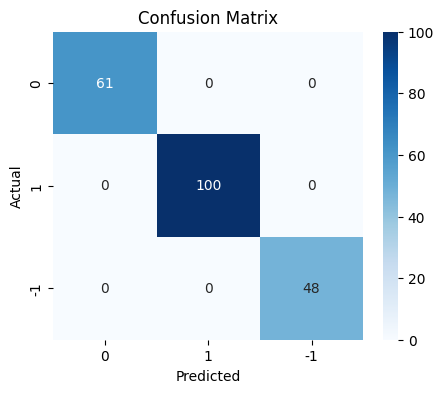

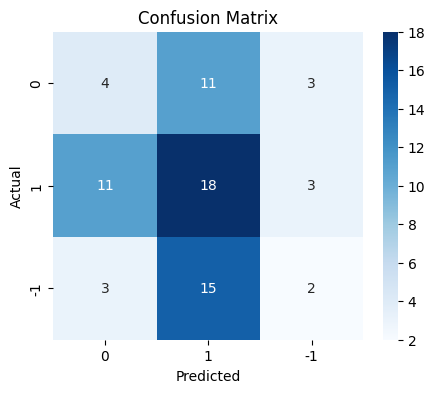

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.342857  0.342857   0.315584  0.314501


In [104]:
# Building the WordtoVec Base model

base_wordtovec = GradientBoostingClassifier(random_state = 42)

# Fitting on train data
base_wordtovec.fit(X_train_vec, y_train)

# plot confusion matrix
model_confusion_matrix(base_wordtovec, X_train_vec, y_train)

model_confusion_matrix(base_wordtovec, X_val_vec, y_val)

#Calculating different metrics on training data
base_train_vec = performance_classification_sklearn(base_wordtovec, X_train_vec, y_train)
print("Training performance:\n", base_train_vec)

#Calculating different metrics on validation data
base_val_vec = performance_classification_sklearn(base_wordtovec, X_val_vec, y_val)
print("Validation performance:\n",base_val_vec)


## Glove - Base

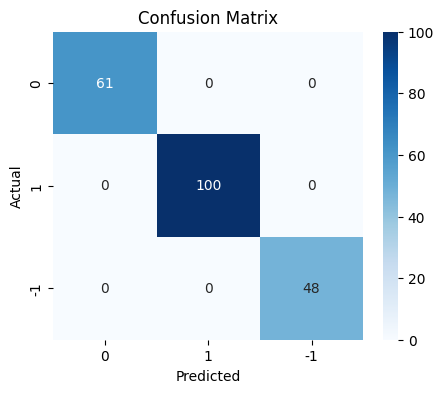

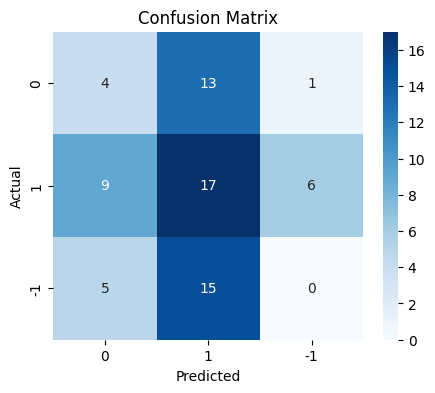

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy  Recall  Precision        F1
0       0.3     0.3   0.229841  0.258998


In [106]:
# Building the Glove Base model

base_glove = GradientBoostingClassifier(random_state = 42)

# Fit on train data
base_glove.fit(X_train_glove, y_train)

# plot confusion matrix
model_confusion_matrix(base_glove, X_train_glove, y_train)

model_confusion_matrix(base_glove, X_val_glove, y_val)

# Calculate different metrics on training data
base_train_glove = performance_classification_sklearn(base_glove, X_train_glove, y_train)
print("Training performance:\n", base_train_glove)

# Calculate different metrics on test data
base_val_glove = performance_classification_sklearn(base_glove, X_val_glove, y_val)
print("Validation performance:\n",base_val_glove)

## Sentence Transformer - Base

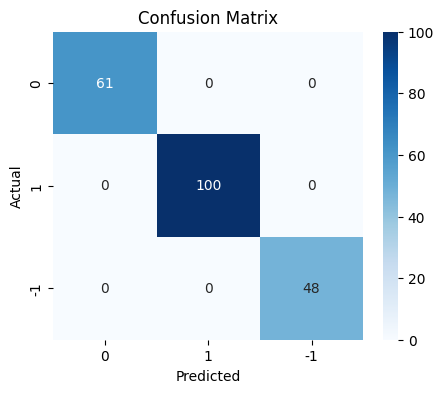

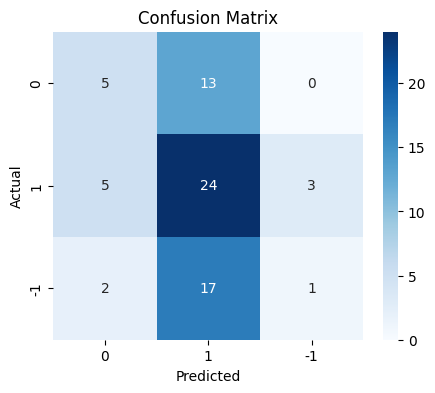

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.428571  0.428571   0.381746  0.364673


In [125]:
# Building the Sentence Transforer Base model

base_sent_trans = GradientBoostingClassifier(random_state = 42)

# Fit on train data
base_sent_trans.fit(X_train_sent_trans, y_train)

# plot confusion matrix
model_confusion_matrix(base_sent_trans, X_train_sent_trans, y_train)

model_confusion_matrix(base_sent_trans, X_val_sent_trans, y_val)

# Calculate different metrics on training data
base_train_sent_trans = performance_classification_sklearn(base_sent_trans, X_train_sent_trans, y_train)
print("Training performance:\n", base_train_sent_trans)

# Calculate different metrics on test data
base_val_sent_trans = performance_classification_sklearn(base_sent_trans, X_val_sent_trans, y_val)
print("Validation performance:\n",base_val_sent_trans)

## Word2Vec - Tuned ##

In [ ]:
start = time.time()

tuned_wordtovec = GradientBoostingClassifier(random_state = 42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wordtovec, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_vec, y_train)

end = time.time()
print("Time taken ",(end-start))

# best combination of parameters

tuned_wordtovec = grid_obj.best_estimator_
print("Tuned Model Parameters: {}".format(grid_obj.best_estimator_))

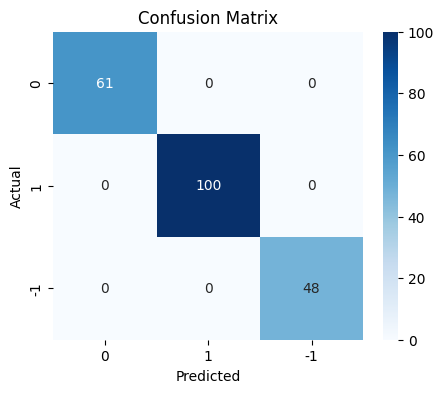

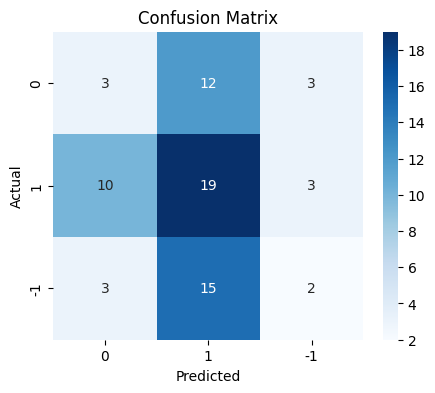

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.342857  0.342857   0.308463  0.308905


In [122]:
# Fit the best algorithm to the data.
tuned_wordtovec.fit(X_train_vec, y_train)

# Plot Confusion matrix
model_confusion_matrix(tuned_wordtovec, X_train_vec, y_train)
model_confusion_matrix(tuned_wordtovec, X_val_vec, y_val)

# Calculate different metrics on training data
tuned_train_wordtovec = performance_classification_sklearn(tuned_wordtovec, X_train_vec, y_train)
print("Training performance:\n", tuned_train_wordtovec)

# Calculate different metrics on test data
tuned_val_wordtovec = performance_classification_sklearn(tuned_wordtovec, X_val_vec, y_val)
print("Validation performance:\n",tuned_val_wordtovec)

## Glove - Tuned ##

In [112]:
start = time.time()

tuned_glove = GradientBoostingClassifier(random_state = 42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_glove, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_glove, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_glove = grid_obj.best_estimator_
print("Tuned Model Parameters: {}".format(grid_obj.best_estimator_))

Time taken  484.0133147239685
Tuned Model Parameters: GradientBoostingClassifier(max_depth=5, max_features='sqrt',
                           min_samples_split=7, random_state=42)


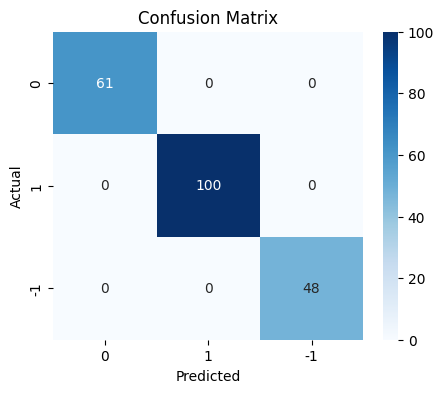

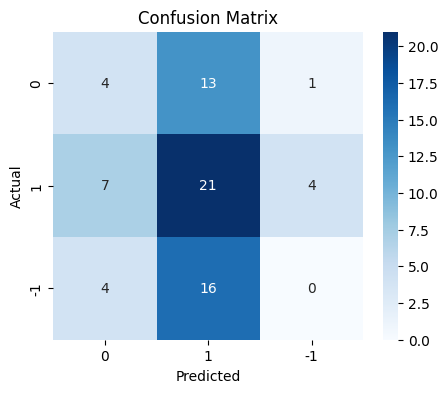

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.357143  0.357143   0.260571  0.296484


In [114]:
# Fit the best algorithm to the data.
tuned_glove.fit(X_train_glove, y_train)

# Plot Confusion matrix
model_confusion_matrix(tuned_glove, X_train_glove, y_train)
model_confusion_matrix(tuned_glove, X_val_glove, y_val)

# Calculate different metrics on training data
tuned_train_glove = performance_classification_sklearn(tuned_glove, X_train_glove, y_train)
print("Training performance:\n", tuned_train_glove)

# Calculate different metrics on test data
tuned_val_glove = performance_classification_sklearn(tuned_glove, X_val_glove, y_val)
print("Validation performance:\n",tuned_val_glove)

## Sentence Transformer - Tuned ##

In [117]:
start = time.time()

tuned_sent_trans = GradientBoostingClassifier(random_state = 42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_sent_trans, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_sent_trans, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_sent_trans = grid_obj.best_estimator_
print("Tuned Model Parameters: {}".format(grid_obj.best_estimator_))

Time taken  680.6468238830566
Tuned Model Parameters: GradientBoostingClassifier(max_depth=4, max_features=0.2, min_samples_split=11,
                           random_state=42)


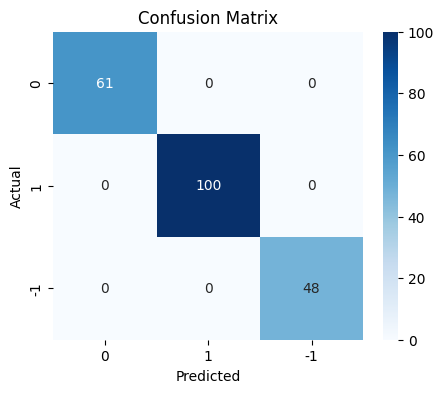

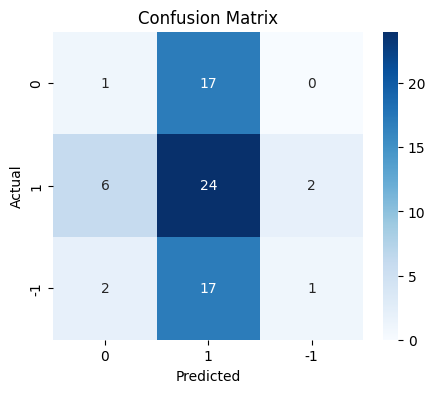

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.371429  0.371429   0.312972  0.287702


In [119]:
# Fit the best algorithm to the data.
tuned_sent_trans.fit(X_train_sent_trans, y_train)

# Plot Confusion matrix
model_confusion_matrix(tuned_sent_trans, X_train_sent_trans, y_train)
model_confusion_matrix(tuned_sent_trans, X_val_sent_trans, y_val)

# Calculate different metrics on training data
tuned_train_sent_trans = performance_classification_sklearn(tuned_sent_trans, X_train_sent_trans, y_train)
print("Training performance:\n", tuned_train_sent_trans)

# Calculate different metrics on test data
tuned_val_sent_trans = performance_classification_sklearn(tuned_sent_trans, X_val_sent_trans, y_val)
print("Validation performance:\n",tuned_val_sent_trans)

## Final Model Selection ##

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [base_train_vec.T,
     base_train_glove.T,
     base_train_sent_trans.T,
     tuned_train_wordtovec.T,
     tuned_train_glove.T,
     tuned_train_sent_trans.T,
    ],axis=1
)

models_train_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Training performance comparison:")
models_train_comp_df

In [ ]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [base_val_vec.T,
     base_val_glove.T,
     base_val_sent_trans.T,
     tuned_val_wordtovec.T,
     tuned_val_glove.T,
     tuned_val_sent_trans.T,
    ],axis=1
)

models_val_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Validation performance comparison:")
models_val_comp_df

## Performace of the selected model on the test data ##

In [ ]:
# Plot confusion matrix of the selected model on test data

model_confusion_matrix(,,)

# Calculate performance metrics of the selected model on test data

final_model_test = performance_classification_sklearn(,,)

print("Test performance for the final selected model: ",final_model_test)

## **Weekly News Summarization**

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

In [ ]:
# Installation for CPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python -q

In [118]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

ModuleNotFoundError: No module named 'llama_cpp'

#### Loading the data

In [115]:
import pandas as pd

stock_data = pd.read_csv("stock_news.csv")
stock_data_copy = stock_data.copy()
stock_data_copy.head()

#### Loading the model

In [115]:
# Load the large language model
model_path = hf_hub_download(
    repo_id="TheBloke/Mistral-7B-Instruct-v0.2-GGUF",
    filename="mistral-7b-instruct-v0.2.Q6_K.gguf"
)

In [ ]:
llm = Llama(
    model_path=model_path,
    n_ctx=4500, # Context window
    n_cores=-2 # Number of CPU cores to use
)

#### Aggregating the data weekly

In [ ]:
# Convert the 'Date' column to datetime format.
stock_data_copy["Date"] = pd.to_datetime(stock_data_copy['Date'])

In [ ]:
# Group the data by week using the 'Date' column.
weekly_grouped = stock_data_copy.groupby(pd.Grouper(key='Date', freq='W'))

In [ ]:
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

In [ ]:
weekly_grouped

In [ ]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Utility Functions

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

In [ ]:
#Defining the response function
def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      {prompt}
      News Articles: {news}
      [/INST]
      """,
      max_tokens=_____, #Complete the code to set the maximum number of tokens the model should generate for this task.
      temperature=_____, #Complete the code to set the value for temperature.
      top_p=_____, #Complete the code to set the value for top_p
      top_k=_____, #Complete the code to set the value for top_k
      echo=False,
    )

    final_output = model_output["choices"][0]["text"]

    return final_output

##### Checking the model output on a sample

**Note**: Use this section to test out the prompt with one instance before using it for the entire weekly data.

##### Checking the model output on the weekly data

##### Formatting the model output

## **Conclusions and Recommendations**

-




<font size=6 color='blue'>Power Ahead</font>
___